In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import collections 

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [10]:
el = open("Email-Enron.txt",'rb')
g= nx.read_edgelist(el, nodetype=int,  create_using= nx.DiGraph()) # edges on each line of the input,
el.close() # we can close the file now

Name: 
Type: DiGraph
Number of nodes: 36692
Number of edges: 367662
Average in degree:  10.0202
Average out degree:  10.0202


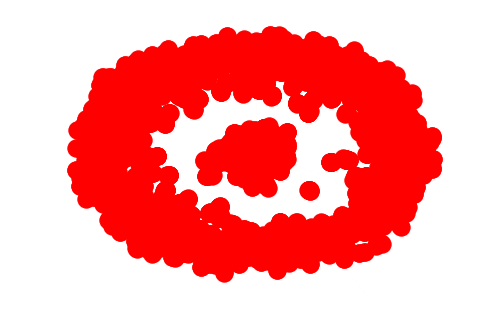

In [11]:
#g = nx.read_edgelist('Email-Enron.txt',  create_using= nx.DiGraph())

print(nx.info(g))
nx.draw(g)
plt.show()

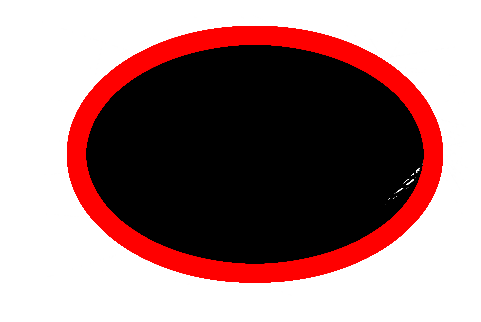

In [12]:
nx.draw_circular(g)

## Node Degrees

In [ ]:
#node_degs = list(G1.degree()) #exploratory phase
#nodes = list(G1) #exploratory phase
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


fig, ax = plt.subplots()
plt.hist(nx.degree(g))

plt.title("Degree Histogram")
plt.ylabel("Degree")
plt.xlabel("Node")

plt.show()

## Density: strongly connected components.

In [ ]:
print (f'The Enron directed graph with density {round(nx.density(g),2)} has {nx.number_strongly_connected_components(g)} strongly connected componenet(s).\n')

## Subgraph containing only strongly connected components.

In [ ]:
components = nx.strongly_connected_components(g)
for component in components:
    print(f'{len(component)}: {component}')
list(g.edges())

## Centrality

In [ ]:
nx.degree_centrality(g)

## Degree Distribution

In [ ]:
def  plot_degree_distribution():
    degs = {}
    for n in g.nodes():
        deg = g.degree(n)
        if deg  not in degs:
            degs[deg] = 0
        degs[deg] += 1
    items = sorted(degs.items ())

## Average Out Degrees

In [ ]:
sum_of_deg = 0
for n in range(len(g)):
    sum_of_deg=sum_of_deg+g._outdegree(n)
    
#print(sum_of_deg)
#print(len(G1))
avg_deg=round(sum_of_deg/len(g),4)
print("The average degree of nodes in the Enron Network is " + str(avg_deg))

## A subgraph that eliminates all nodes with degrees less than the average out-degree

In [ ]:
remove = [node for node,degree in dict(g.degree()).items() if (degree < avg_deg) ]
print("We remove a total of " +str(len(remove)) +" from the Enron Network and re-evaluate the subgraph ".
#print("Nodes to be removed.")
#print(remove)

In [ ]:
g_avg=g
g_avg.remove_nodes_from(remove)
print(nx.info(g_avg))
nx.draw(g_avg)
plt.show()

## A subgraph that eliminates all nodes with degrees less than twice the average out-degree

In [ ]:
avg_deg_times2 = avg_deg*2
print(avg_deg_times2)
remove1 = [node for node,degree in dict(g.degree()).items() if (degree < avg_deg_times2) ]
print("We remove a total of " +str(len(remove1)) +" from the Enron Network and re-evaluate the subgraph ".

In [ ]:
g_2avg=g
g_2avg.remove_nodes_from(remove1)
print(nx.info(g_avg))
nx.draw(g_a2vg, with_labels=TRUE )
plt.show()

### Degree Centrality

In [ ]:
degree_centrality(g_2avg)

### Degrees Histogram

In [ ]:
degree_sequence = sorted([d for n, d in g_2avg.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


fig, ax = plt.subplots()
plt.hist(nx.degree(g_2avg))

plt.title("Degree Histogram")
plt.ylabel("Degree")
plt.xlabel("Node")

plt.show()

In [ ]:
sum_of_deg2 = 0
for n in range(len(g)):
    sum_of_deg2=sum_of_deg2+g_2avg._outdegree(n)
    
avg_deg2=round(sum_of_deg2/len(g_2avg),4)
print("The average degree of nodes in the Enron Network subgraph is " + str(avg_deg2))

In [ ]:
print (f'The Enron directed graph with density {round(nx.density(g_2avg),2)} has {nx.number_strongly_connected_components(g_2avg)} strongly connected componenet(s).\n')

### Strong Components

In [ ]:
strong_components1 = nx.strongly_connected_components(g_2avg)
for strong_component in strong_components1:
    print(f'{len(strong_component)}: {strong_component}')